In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn import linear_model
sns.set_style('white')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.graphics.gofplots import ProbPlot


/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
auto = pd.read_csv('../data/Auto.csv', na_values = ['?'])

In [3]:
auto_simple_mod = smf.ols(formula = 'mpg ~ horsepower', data = auto)
auto_simple_fit = auto_simple_mod.fit()
print(auto_simple_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           7.03e-81
Time:                        14:29:48   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

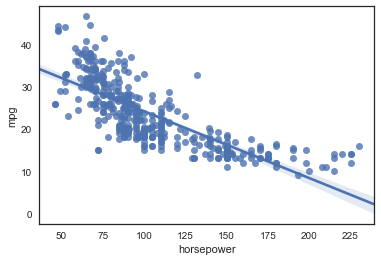

In [4]:
sns.regplot(auto.horsepower, auto.mpg)

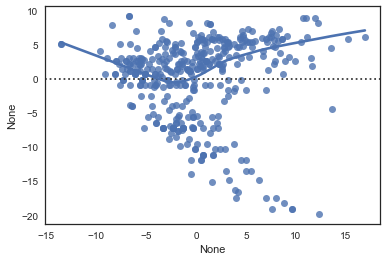

In [5]:
sns.residplot(auto_simple_fit.resid, auto_simple_fit.fittedvalues, lowess = True)

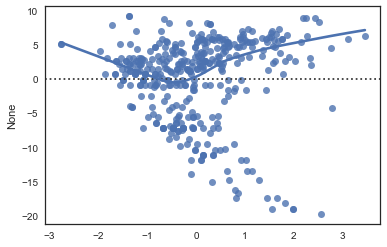

In [6]:
sns.residplot(auto_simple_fit.get_influence().resid_studentized_internal, auto_simple_fit.fittedvalues, lowess = True)

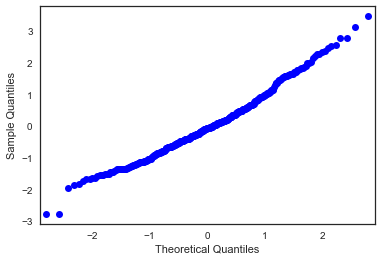

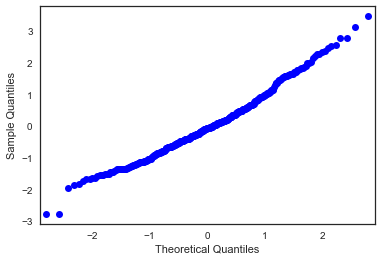

In [7]:
QQ = ProbPlot(auto_simple_fit.get_influence().resid_studentized_internal)
QQ.qqplot()

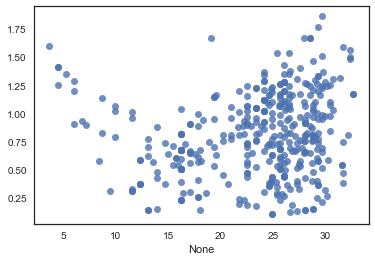

In [8]:
sns.regplot(auto_simple_fit.fittedvalues, np.sqrt(np.abs(auto_simple_fit.get_influence().resid_studentized_internal)), fit_reg = False, lowess = True)

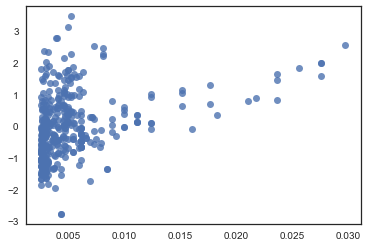

In [9]:
sns.regplot(auto_simple_fit.get_influence().hat_matrix_diag, auto_simple_fit.get_influence().resid_studentized_internal, fit_reg = False)

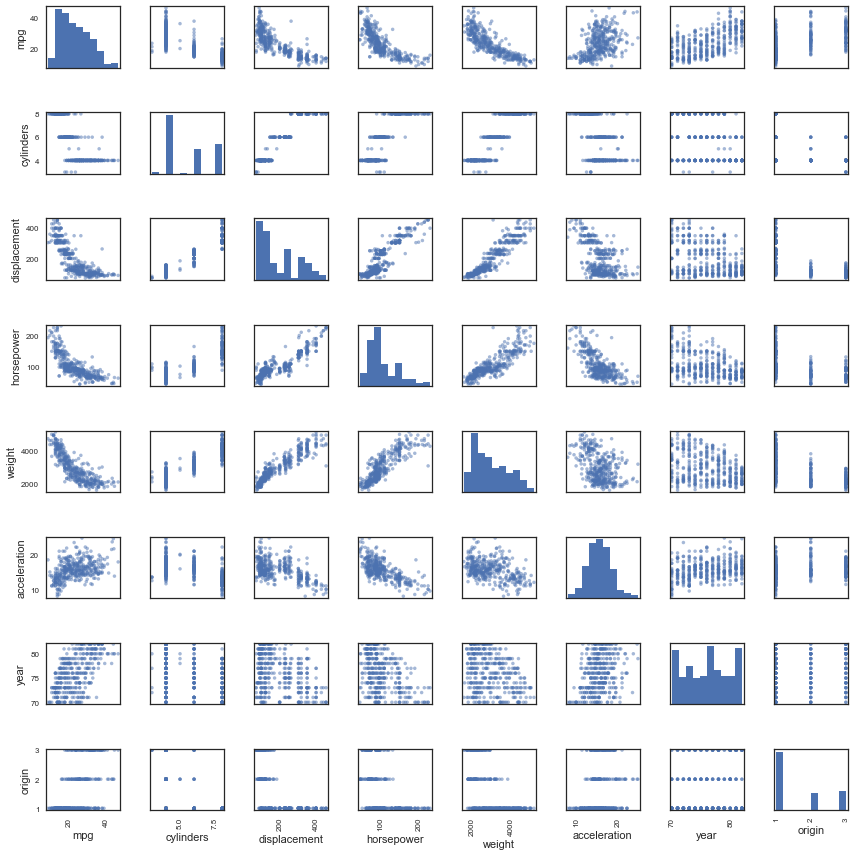

In [10]:
ax = pd.plotting.scatter_matrix(auto)
plt.tight_layout(rect = (0,0,2,3))
plt.show()

In [11]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


In [12]:
auto_no_na = auto.dropna()
auto_x = auto_no_na.drop(['mpg', 'name'], axis = 1)
auto_x = sm.add_constant(auto_x)
auto_y = auto_no_na.mpg
auto_multi_mod = sm.OLS(auto_y, auto_x).fit()

In [13]:
auto_multi_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 01 Dec 2017   Prob (F-statistic):          2.04e-139
Time:                        14:29:55   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           5.40e-99
Time:                        14:29:55   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

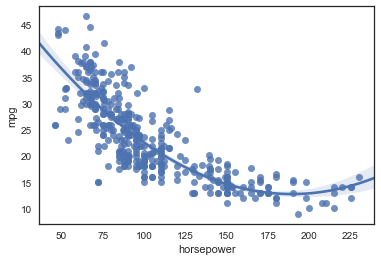

In [14]:
auto_quad_mod = smf.ols(formula = 'mpg ~ horsepower + I(horsepower**2)', data = auto)
auto_quad_fit = auto_quad_mod.fit()
print(auto_quad_fit.summary())
sns.regplot(auto.horsepower, auto.mpg, order = 2)

In [15]:
auto_ix_mod = smf.ols(formula = 'mpg ~ displacement*weight', data = auto)
auto_ix_fit = auto_ix_mod.fit()
print(auto_ix_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     347.5
Date:                Fri, 01 Dec 2017   Prob (F-statistic):          3.73e-110
Time:                        14:29:56   Log-Likelihood:                -1122.5
No. Observations:                 397   AIC:                             2253.
Df Residuals:                     393   BIC:                             2269.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              53.9596    

In [16]:
auto.displacement.describe()

count    397.000000
mean     193.532746
std      104.379583
min       68.000000
25%      104.000000
50%      146.000000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


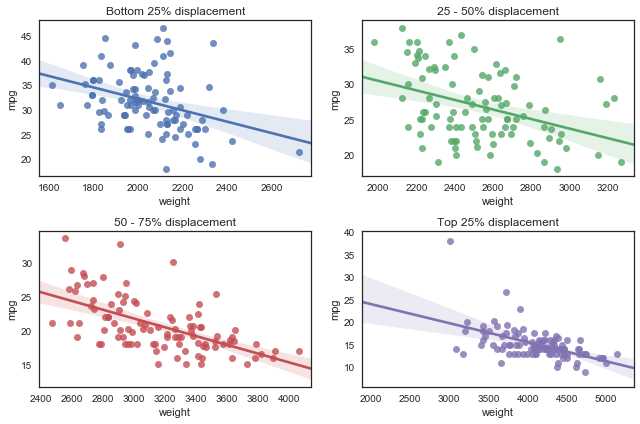

In [17]:
p1 = auto[auto.displacement < auto.displacement.describe()['25%']]

p2 = auto[auto.displacement < auto.displacement.describe()['50%']]
p2 = p2[p2.displacement >= auto.displacement.describe()['25%']]

p3 = auto[auto.displacement < auto.displacement.describe()['75%']]
p3 = p3[p3.displacement >= auto.displacement.describe()['50%']]

p4 = auto[auto.displacement >= auto.displacement.describe()['75%']]

f, ax = plt.subplots(2,2)

sns.regplot(p1.weight, p1.mpg, ax = ax[0][0]).set_title('Bottom 25% displacement')
sns.regplot(p2.weight, p2.mpg, ax = ax[0][1]).set_title('25 - 50% displacement')
sns.regplot(p3.weight, p3.mpg, ax = ax[1][0]).set_title('50 - 75% displacement')
sns.regplot(p4.weight, p4.mpg, ax = ax[1][1]).set_title('Top 25% displacement')

f.tight_layout(rect = (0,0,1.5,1.5))
f.show()

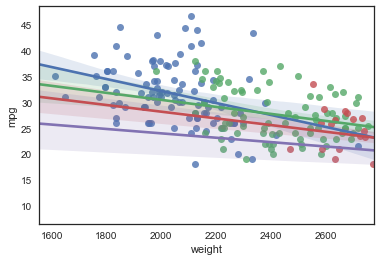

In [18]:
sns.regplot(p1.weight, p1.mpg)
sns.regplot(p2.weight, p2.mpg)
sns.regplot(p3.weight, p3.mpg)
sns.regplot(p4.weight, p4.mpg)

In [19]:
carseats = pd.read_csv('../data/Carseats.csv', index_col = 0)

In [20]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [21]:
car_multi = smf.ols(formula = 'Sales ~ Population + Urban + US', data = carseats)
car_fit = car_multi.fit()
print(car_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.563
Date:                Fri, 01 Dec 2017   Prob (F-statistic):            0.00371
Time:                        14:29:58   Log-Likelihood:                -975.56
No. Observations:                 400   AIC:                             1959.
Df Residuals:                     396   BIC:                             1975.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.7262      0.401     16.776   

In [22]:
car_single = smf.ols(formula = 'Sales ~ US', data = carseats)
car_single_fit = car_single.fit()
print(car_single_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.89
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           0.000372
Time:                        14:29:58   Log-Likelihood:                -975.98
No. Observations:                 400   AIC:                             1956.
Df Residuals:                     398   BIC:                             1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8230      0.234     29.215      0.0

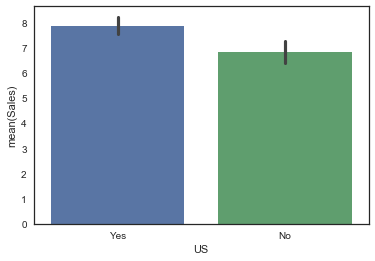

In [23]:
sns.barplot(x = carseats.US, y = carseats.Sales)

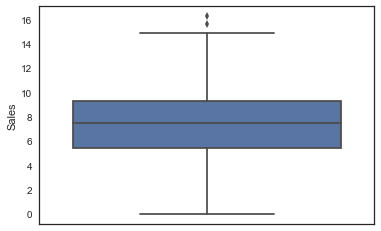

In [24]:
sns.boxplot(carseats.Sales, orient = 'v')

In [25]:
x = np.random.normal(size = 100)
y = 2*x + np.random.normal(size = 100)

In [26]:
simple_mod = sm.OLS(y, x).fit()
print(simple_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     474.8
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           1.47e-39
Time:                        14:29:58   Log-Likelihood:                -127.88
No. Observations:                 100   AIC:                             257.8
Df Residuals:                      99   BIC:                             260.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9273      0.088     21.791      0.0

In [27]:
simple_model_t = sm.OLS(endog = x, exog = y).fit()
print(simple_model_t.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     474.8
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           1.47e-39
Time:                        14:29:58   Log-Likelihood:                -52.796
No. Observations:                 100   AIC:                             107.6
Df Residuals:                      99   BIC:                             110.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4293      0.020     21.791      0.0

In [28]:
x1 = sm.add_constant(x)
y1 = sm.add_constant(y)

In [29]:
print(sm.OLS(y, x1).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     478.2
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           1.77e-39
Time:                        14:29:58   Log-Likelihood:                -127.12
No. Observations:                 100   AIC:                             258.2
Df Residuals:                      98   BIC:                             263.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1065      0.087     -1.221      0.2

In [30]:
print(sm.OLS(x, y1).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     478.2
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           1.77e-39
Time:                        14:29:58   Log-Likelihood:                -52.060
No. Observations:                 100   AIC:                             108.1
Df Residuals:                      98   BIC:                             113.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0496      0.041      1.205      0.2

coefficient is equivalent to rise over run, so if it had been y = x + np.random.normal(size = 100) the coefficient would have been the same

In [31]:
x2 = stats.truncnorm(0,1).rvs(size = 100)
eps = stats.truncnorm(0,0.25).rvs(size = 100)
y2 = -1 + (0.5 * x2) + eps

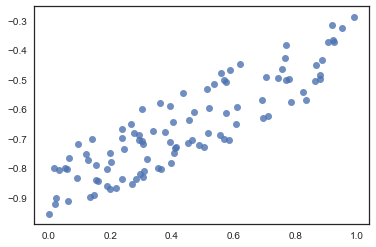

In [32]:
sns.regplot(x2, y2, fit_reg = False)

In [33]:
x3 = sm.add_constant(x2)
print(sm.OLS(y2, x3).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     339.6
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           1.31e-33
Time:                        14:29:58   Log-Likelihood:                 118.16
No. Observations:                 100   AIC:                            -232.3
Df Residuals:                      98   BIC:                            -227.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8877      0.014    -61.960      0.0

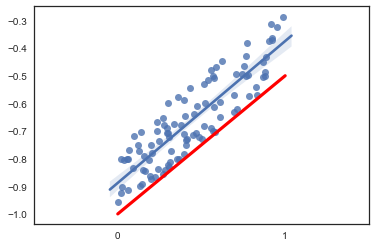

In [34]:
sns.regplot(x2, y2)
sns.pointplot([0,1], [-1, -0.5], markers = '', ci =0, color = 'red')

offset because all the error terms are in the same (positive) direction

errors should be centered at zero

additionally, the error term epsilon could be made larger or smaller

actually now I wonder if they meant for that to be a truncated normal distribution or if the directions were giving us the mu and the sigma?

In [35]:
#could still do problems 14 and 15 but things are getting repetitive